In [29]:
from sklearn.cluster import KMeans
import numpy as np
from plotnine import *
import pandas as pd
from sklearn.neighbors.nearest_centroid import NearestCentroid

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
umap_embedding = np.genfromtxt('../data/3K_PBMC_umap_embedding.txt', delimiter=',')

In [32]:
leiden_labels = np.genfromtxt('../data/3K_PBMC_clust_ids_leiden.txt').astype(int)

In [33]:
leiden_labels

array([3, 2, 0, ..., 2, 2, 0])

In [34]:
# find centroids for the leiden clustering for k-means initialization
clf = NearestCentroid()
clf.fit(umap_embedding, leiden_labels)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [38]:
clf.centroids_.shape

(8, 2)

In [15]:
umap = pd.DataFrame({'UMAP1': umap_embedding[:,0],
                   'UMAP2': umap_embedding[:,1]
                    })

In [16]:
umap

UMAP1      UMAP2
0     9.771753   4.248872
1     6.930662  12.163256
2     6.680933   5.156033
3    -0.840508   4.785914
4     8.295408  -0.340347
...        ...        ...
2633  1.453182   6.334352
2634  6.670451  11.957979
2635  4.838667  12.512801
2636  6.041691  13.781124
2637  6.912276   4.544454

[2638 rows x 2 columns]

In [17]:
ggplot(aes(x='UMAP1', y='UMAP2'), umap) + geom_point()

<ggplot: (8783779094441)>

In [39]:
kmeans = KMeans(n_clusters=8, init = clf.centroids_).fit(umap_embedding)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


In [40]:
kmeans.labels_

array([3, 2, 0, ..., 2, 2, 3], dtype=int32)

In [49]:
np.savetxt('../data/3K_PBMC_clust_ids_kmeans.txt', kmeans.labels_, fmt = '%s')

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


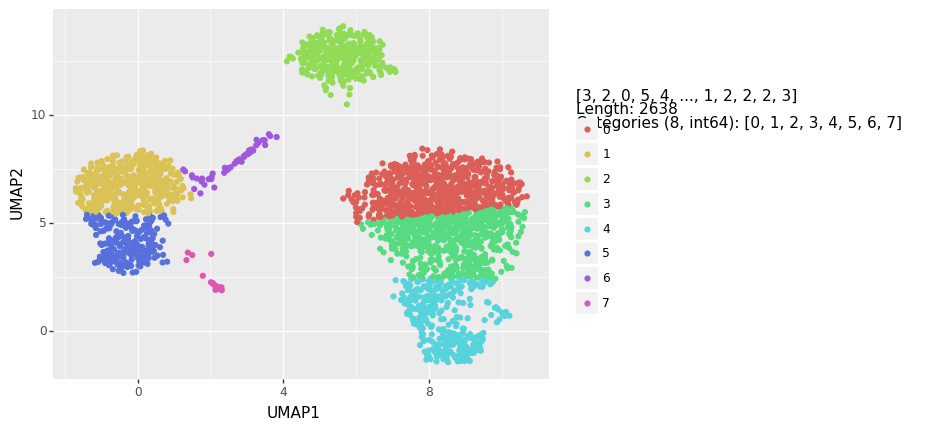

<ggplot: (8783782743641)>

In [43]:
ggplot(aes(x='UMAP1', y='UMAP2'), umap) + geom_point(aes(color = pd.Categorical(kmeans.labels_)))

In [44]:
ggplot(aes(x='UMAP1', y='UMAP2'), umap) + geom_point(aes(color = pd.Categorical(leiden_labels)))

/opt/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


<ggplot: (8783782898121)>